In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Rescaling
from keras.utils import image_dataset_from_directory
# from tensorflow.keras.preprocessing.image import ImageDataGenerator



2.16.2


In [2]:
# Load pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the base model (for now)
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

![Diagram](./classifications.png "System Architecture Diagram")

In [3]:
# Create new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'), # reminder outpus zero for negative values
    Dense(1, activation='sigmoid') # binary classification 
])
# Compile model
model.compile(optimizer='adam', #reminder optimizers are used to calculate the weights (minimzing the loss function)
              loss='binary_crossentropy', # loss function for predicted probability vs actual labels
              metrics=['accuracy'])

In [4]:
# Create placeholder images
from utils.images import make_images
make_images()

Sample images created in 'sample_data/'


In [5]:

train_dataset = image_dataset_from_directory(
    'sample_data', 
    label_mode='binary', 
    batch_size=32, 
    image_size=(224, 224))

val_dataset = image_dataset_from_directory(
    'sample_data', 
    label_mode='binary', 
    batch_size=32, 
    image_size=(224, 224))

# Normalize the data
normalization_layer = Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)



Found 20 files belonging to 2 classes.
Found 20 files belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.8400 - val_accuracy: 0.5000 - val_loss: 5.7470
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 5.7470 - val_accuracy: 0.5000 - val_loss: 3.0721
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 3.0721 - val_accuracy: 1.0000 - val_loss: 0.3550
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.3550 - val_accuracy: 0.5000 - val_loss: 1.2465
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.2465 - val_accuracy: 0.5000 - val_loss: 1.3208
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.3208 - val_accuracy: 0.5000 - val_loss: 1.2541
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.2541 - val_accuracy: 0.5000 - val_loss: 1.1059
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.5973 - val_accuracy: 1.0000 - val_loss: 0.3364
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.3364 - val_accuracy: 0.5000 - val_loss: 6.1228
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 6.1228 - val_accuracy: 0.5000 - val_loss: 2.3354
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 2.3354 - val_accuracy: 1.0000 - val_loss: 0.5171
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.5171 - val_accuracy: 0.5000 - val_loss: 0.6806
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6806 - val_accuracy: 0.5000 - val_loss: 0.6144
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6144 - val_accuracy: 1.0000 - val_loss: 0.5066
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.5066 - val_accuracy: 1.0000 - val_loss: 0.3408
Epoch 9/10
1/1 ━

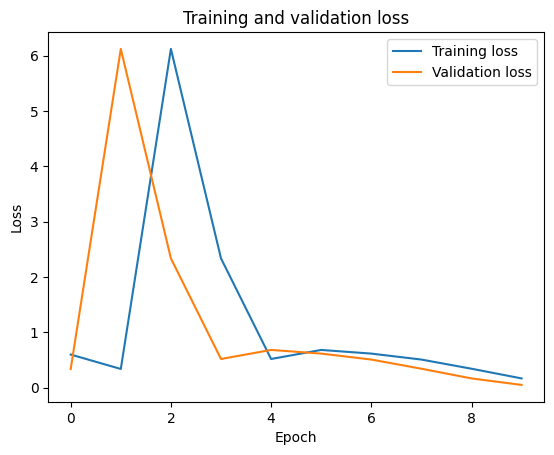

In [6]:
# In order to fine-tune the model, we need to unfreeze the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
# Evaluate the model
test_dataset = image_dataset_from_directory(
    'sample_data', 
    label_mode='binary', 
    batch_size=32, 
    image_size=(224, 224))

# Normalize the data
normalization_layer = Rescaling(1./255)
test_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))

test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test accuracy:', test_accuracy)
print('Test loss:', test_loss)


Found 20 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.5782
Test accuracy: 0.5
Test loss: 1.5781714916229248
